собственные значения:  [5.85601918e+00 8.50458188e-01 6.95219416e-02 3.76312252e-03
 6.05922603e-01]
мое решение: [-0.83522492 -2.84103209  6.77713065  1.35223611 -4.01131851]
решение numpy: [  4.26191741 -39.4185296   24.90432238  18.5468929  -22.01578436]
diff: 48.086445872523996
my time: 0.0026361942291259766 seconds
np time: 9.608268737792969e-05 seconds


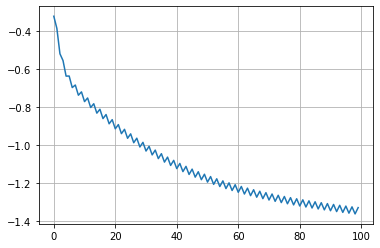

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve(A, b, max_iterations_count, tol, use_grad):
    x = np.ones_like(b)
    r = A @ x - b
    R = np.linalg.norm(r)
    residuals = [R,]
    iterations = 0
    while iterations < max_iterations_count and R > tol:
        if use_grad:
            t = R**2 / np.dot(A @ r, r)
        else:
            t = np.dot(r, A @ r) / np.linalg.norm(A @ r) ** 2
        x -= t * r
        r = A @ x - b
        R = np.linalg.norm(r)
        residuals.append(R)
        iterations += 1 
    
    return x, residuals
    
N = 5
A = np.random.rand(N, N)
A = A @ A.T
# A = 0.5 * (A + A.T) + np.eye(N)
print('собственные значения: ', np.linalg.eig(A)[0])
b = np.random.rand(N)

my_start = time.time()
my_solution, residuals = solve(A, b, 100, 10**(-10), True)
my_elapsed = time.time() - my_start

np_start = time.time()
np_solution = np.linalg.solve(A, b)
np_elapsed = time.time() - np_start

print(f"мое решение: {my_solution}\nрешение numpy: {np_solution}")
diff = np.linalg.norm(my_solution - np_solution)
print(f'diff: {diff}')
print(f'my time: {my_elapsed} seconds\nnp time: {np_elapsed} seconds')

residuals = np.log(np.array(residuals))
plt.plot(residuals[1:])
plt.grid(True)
